## K-Means Clustering Algorithm Example
### Amir, NUS SoC ACE, 2025


In [2]:
# Dependencies and libraries
%matplotlib inline
import pandas as pd
import numpy as np
import random
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Connecting to Google drive and openning the file
# path plus file is there, file is celebs2.csv
# Variables are Height in cm, Weight in kg, and sex, 1= female , 2= male
#

# Load the dataset
file_path = "sample_data/celebs2.csv"

In [9]:
# We just use Height and Weight for clustering.
# X is our feature matrix, can be seen here
train = pd.read_csv(file_path)
type(train)
X = train.values
X = X[:,0:2]
print(X)



[[167.64   54.36 ]
 [172.7    55.266]
 [172.7    54.36 ]
 [170.2    56.625]
 [157.5    51.189]
 [174.     57.984]
 [167.6    58.437]
 [172.7    56.625]
 [160.     51.189]
 [160.     51.642]
 [156.2    47.565]
 [162.6    55.266]
 [183.     58.89 ]
 [157.5    47.565]
 [158.8    48.924]
 [160.     47.565]
 [157.5    48.471]
 [180.3    54.36 ]
 [167.6    52.548]
 [166.4    52.548]
 [154.9    57.531]
 [167.6    54.36 ]
 [171.5    49.83 ]
 [160.     55.266]
 [163.8    51.642]
 [172.7    52.548]
 [158.8    54.36 ]
 [166.4    57.531]
 [162.6    48.471]
 [164.     48.018]
 [177.8    51.189]
 [162.6    50.283]
 [179.1    55.266]
 [172.7    49.377]
 [157.5    44.847]
 [180.3    77.01 ]
 [157.5    52.548]
 [172.7    59.343]
 [160.     46.206]
 [157.5    53.001]
 [160.     45.3  ]
 [162.     50.736]
 [157.5    57.984]
 [167.6    48.924]
 [182.2    74.745]
 [189.     99.66 ]
 [193.     86.07 ]
 [180.3    79.728]
 [165.     81.087]
 [175.     73.839]
 [175.     60.702]
 [198.    110.079]
 [182.     8

In [ ]:
# Shape of the feature matrix
X.shape

(150, 2)

#### Important Cell
1. The model, called kmeans, is defined as an instance of class KMeans
2. We declare hyper parameters as number of clusters, n_cluster, maximum training iterations, and the name of training algorithm, here algorithm= 'lloyd'
3. Also, we can use 'elkan' as the training algorithm
4. then we call the function fit for that kmeans model to train it.

In [ ]:
kmeans = KMeans(n_clusters=2, max_iter=40 , algorithm = 'lloyd')  # or algorithm='lloyd or elkan')
kmeans.fit(X)

KMeans(max_iter=40, n_clusters=2)

In [ ]:
# to see the type of that abstract data type/ instance of class KMeans, called
# kmeans
#
type(kmeans)

sklearn.cluster._kmeans.KMeans

In [ ]:
# then we test the model by asking that to provide cluster labels for the X
# or the feature vector. Function predict does that
y_kmeans = kmeans.predict(X)

In [ ]:
# showing the cluster labels and cluster centers
#
print(y_kmeans.shape)
print(y_kmeans)
kmeans.cluster_centers_

(90,)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0]


array([[181.01047619,  84.34428571],
       [165.86125   ,  53.6333125 ]])

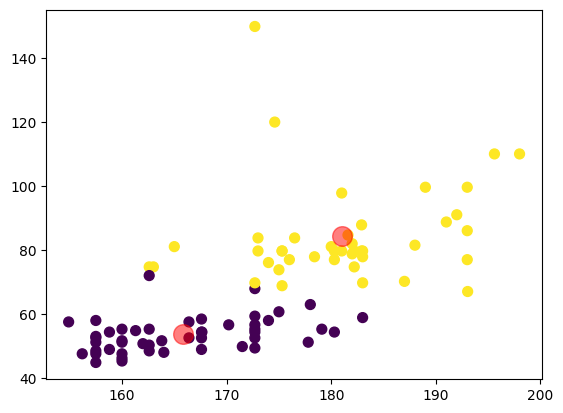

In [ ]:
# scatter plot to show the clusters in our 2d feature space.
# Samples belong to each cluster shown in different colors
# big pink dots are cluster centers
#
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

## Now it's the practice time...
1. Study the effects of changing the number of clusters to 3 and 4, n_cluster=...
2. Study the effects of changing the clustering algorithm from lloyd to elkan
3. Study the meaning of inter_cluster_distance and intra_cluster_distance
4. Answer please, after a good clusterng the intra_cluster_distance to inter_cluster_distance ratio should be (max/min).
5. Develop a function to compute  the intra_cluster_distance and  inter_cluster_distance. Input parameters are the feature matrix, X, and cluster labels predicted by any given clustering algorithm, e.g., y_kmeans here.
6. Try iris.csv dataset and go for n_cluster= 2 and 3 and 4. Use lloyd algorithm.
7. Which one provides the smallest intra to inter_cluster_distance ratio?

K - Means Clustering
K-means clustering is a clustering algorithm that aims to partition n observations into k clusters. Initialisation – K initial “means” (centroids) are generated at random Assignment – K clusters are created by associating each observation with the nearest centroid Update – The centroid of the clusters becomes the new mean, Assignment and Update are repeated iteratively until convergence The end result is that the sum of squared errors is minimised between points and their respective centroids. We will use KMeans Clustering. At first we will find the optimal clusters based on inertia and using elbow method. The distance between the centroids and the data points should be less.

Determining No. of Clusters Required <br>
**The Elbow Method**

The Elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters. By default, the distortion score is computed, the sum of square distances from each point to its assigned center.

When these overall metrics for each model are plotted, it is possible to visually determine the best value for k. If the line chart looks like an arm, then the “elbow” (the point of inflection on the curve) is the best value of k. The “arm” can be either up or down, but if there is a strong inflection point, it is a good indication that the underlying model fits best at that point.

We use the Elbow Method which uses Within Cluster Sum Of Squares (WCSS) against the the number of clusters (K Value) to figure out the optimal number of clusters value. WCSS measures sum of distances of observations from their cluster centroids which is given by the below formula.

For a given cluster \(k\) with \(n{k}\) points \(x_{i}\) (where \(i=1\) to \(n_{k}\)) and centroid \(\mu _{k}\):

Distance Calculation: For each point \(x_{i}\) in cluster \(k\), find the squared Euclidean distance to the centroid

\(\mu _{k}\):\(d_{i}^{2}=||x_{i}-\mu _{k}||^{2}\).

Cluster WCSS: Sum these squared distances for all points in cluster \(k\):

\(WCSS_{k}=\sum _{i=1}^{n_{k}}||x_{i}-\mu _{k}||^{2}\).

Total WCSS: Sum the WCSS for all clusters (from \(j=1\) to \(K\), where \(K\) is the total number of clusters):\

(WCSS_{Total}=\sum _{j=1}^{K}WCSS_{j}=\sum _{j=1}^{K}\sum _{i=1}^{n_{j}}||x_{i}-\mu _{j}||^{2}\).

where Yi is centroid for observation Xi. The main goal is to maximize number of clusters and in limiting case each data point becomes its own cluster centroid.

With this simple line of code we get all the inertia value or the within the cluster sum of square.

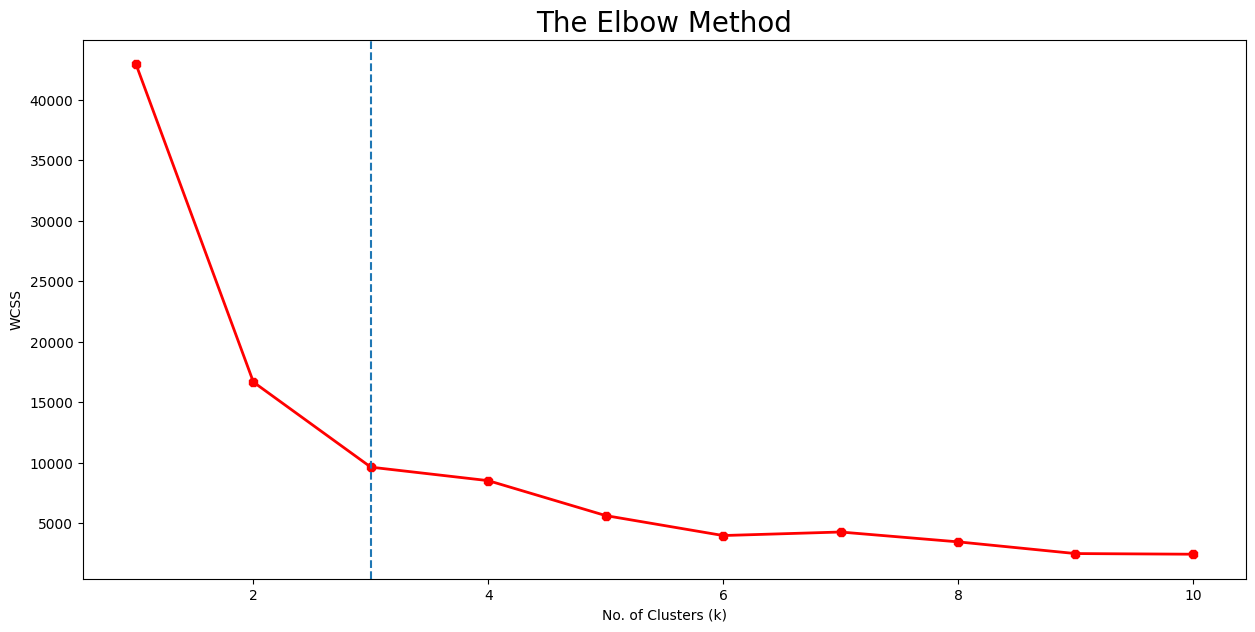

In [10]:
wcss=[]
for i in range(1,11):
    km = KMeans(i)
    km.fit(X)
    wcss.append(km.inertia_)
np.array(wcss)

fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.axvline(x=3, ls='--')
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()

#From the below output 3 is the good no of clusters

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1]
0.5620194780570676
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 0 2 0 0 0 0 1 0 0 0 0 1 0]
0.5670864520391341
[1 1 1 1 3 1 1 1 3 3 3 3 1 3 3 3 3 1 1 1 3 1 1 3 3 1 3 1 3 3 1 3 1 1 3 0 3
 1 3 3 3 3 3 1 0 2 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 2
 0 0 0 0 2 0 0 0 0 3 0 0 0 0 1 0]
0.476806487054589
[4 4 4 4 1 4 4 4 1 1 1 1 4 1 1 1 1 4 1 1 1 4 4 1 1 4 1 4 1 1 4 1 4 4 1 3 1
 4 1 1 1 1 1 1 0 2 3 3 3 3 4 2 3 3 3 3 4 3 3 3 3 2 3 4 3 3 2 3 3 3 2 3 3 3
 4 3 4 3 2 4 0 3 3 1 0 0 0 4 4 3]
0.3734078256238549
[1 1 1 1 3 1 1 1 3 3 3 3 1 3 3 3 3 1 1 3 3 1 1 3 3 1 3 1 3 3 1 3 1 1 3 5 3
 1 3 3 3 3 3 3 5 2 5 5 0 0 1 2 5 2 0 0 0 5 0 0 0 4 5 0 5 5 2 5 5 5 4 5 5 2
 0 5 0 5 2 0 5 0 5 3 5 5 5 0 1 5]
0.437

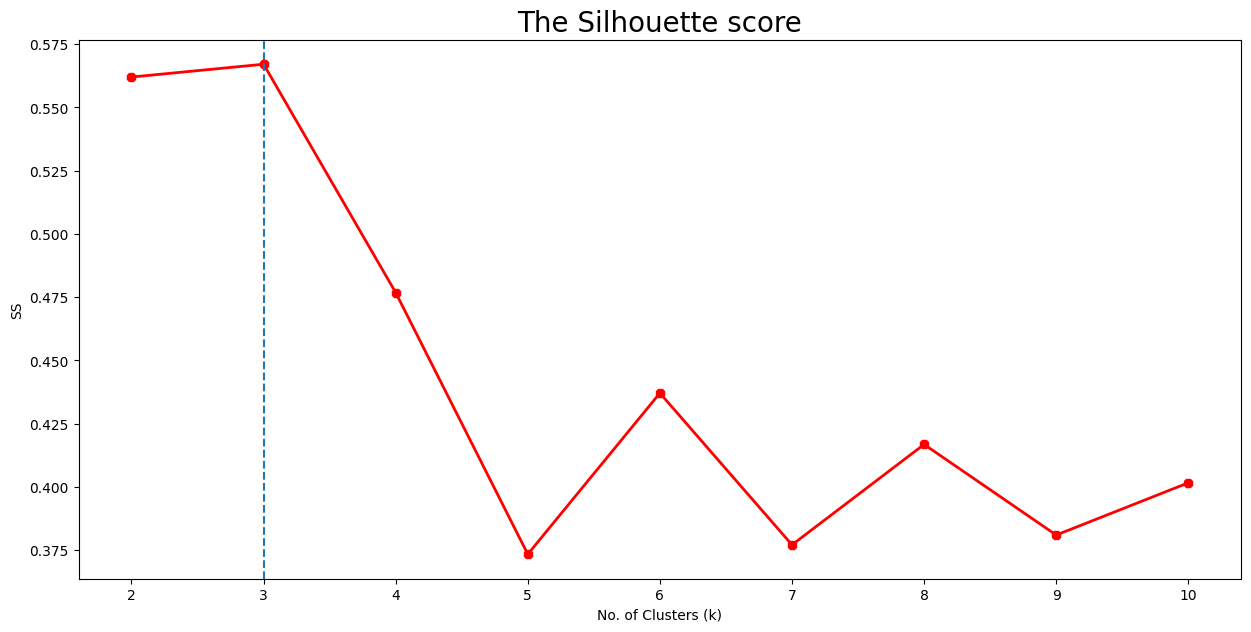

0.4016382698767777


In [16]:
#Finding optimal K using silhouette_score
from sklearn.metrics import silhouette_score
ss=[]
for i in range(2,11):
    km = KMeans(n_clusters=i)
    labels = km.fit_predict(X)
    print(labels)
    score = silhouette_score(X, labels)
    print(score)
    ss.append(score)
np.array(ss)

fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(2,11),ss, linewidth=2, color="red", marker ="8")
plt.axvline(x=3, ls='--')
plt.ylabel('SS')
plt.xlabel('No. of Clusters (k)')
plt.title('The Silhouette score', fontsize = 20)
plt.show()


In [8]:
#Develop a function to compute the intra_cluster_distance and inter_cluster_distance.
#Input parameters are the feature matrix, X, and cluster labels predicted by any given clustering algorithm,
#e.g., y_kmeans here.
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics.pairwise import euclidean_distances

# intercluster_dist_matrix = pairwise_distances(kmeans.cluster_centers_
# , kmeans.cluster_centers_
# , metric='euclidean')

# print(intercluster_dist_matrix)

def compute_cluster_distances(X, labels):
    """
    Computes average intra-cluster and inter-cluster distances.

    Parameters:
    X (array-like): Feature matrix of shape (n_samples, n_features)
    labels (array-like): Cluster labels of shape (n_samples,)

    Returns:
    tuple: (avg_intra_cluster_distance, avg_inter_cluster_distance)
    """
    unique_labels = np.unique(labels)
    cluster_centers = {}

    # 1. Compute Centroids
    for label in unique_labels:
        cluster_centers[label] = X[labels == label].mean(axis=0)

    # 2. Compute Intra-cluster Distance (Average distance to centroid)
    intra_dists = []
    for label in unique_labels:
        cluster_points = X[labels == label]
        centroid = cluster_centers[label].reshape(1, -1)
        # Distance of each point in cluster to its centroid
        dists = euclidean_distances(cluster_points, centroid)
        intra_dists.append(np.mean(dists))

    avg_intra = np.mean(intra_dists)

    # 3. Compute Inter-cluster Distance (Average distance between centroids)
    centers_list = np.array([cluster_centers[l] for l in unique_labels])
    if len(centers_list) > 1:
        # Pairwise distances between all centers
        center_dists = euclidean_distances(centers_list)
        # Extract upper triangle (excluding diagonal) to get unique pair distances
        upper_tri_indices = np.triu_indices(len(center_dists), k=1)
        avg_inter = np.mean(center_dists[upper_tri_indices])
    else:
        avg_inter = 0.0 # Only one cluster exists

    return avg_intra, avg_inter



[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.418      1.464      0.244     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


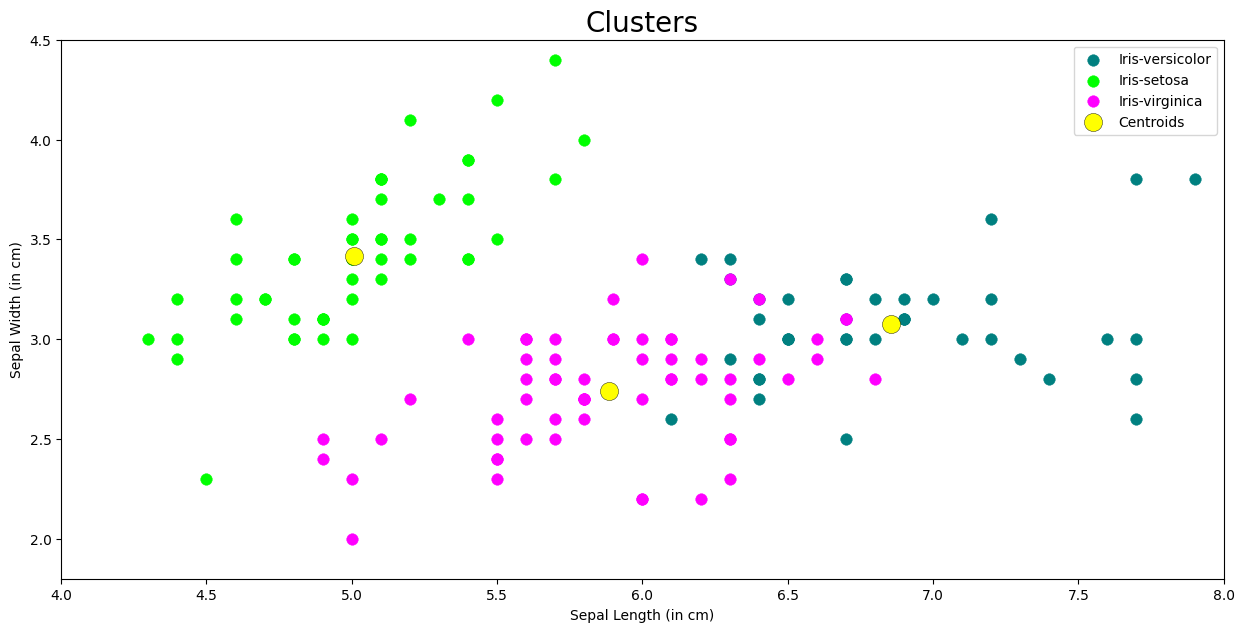

In [6]:
#Try iris.csv dataset and go for n_cluster= 2 and 3 and 4. Use lloyd algorithm
file_path1 = 'sample_data/Iris.xlsx'
train1 = pd.read_excel(file_path1)
X1 = train1.values
X1 = X1[:,0:4]

#print(X1)
kmeans1 = KMeans(n_clusters=3, max_iter=40 , algorithm = 'lloyd') # or algorithm='lloyd or elkan')
kmeans1.fit(X1)
y_means1 = kmeans1.predict(X1)
centers = kmeans1.cluster_centers_
print(centers)

clusters= pd.DataFrame({'SepalLengthCm': X1[:, 0], 'SepalWidthCm': X1[:, 1], 'PetalLengthCm': X1[:, 2], 'PetalWidthCm': X1[:, 3], 'Cluster_Prediction': y_means1})
# sns.pairplot(clusters, hue='Cluster_Prediction', palette='viridis')
# plt.suptitle('Pairplot of 4 Features by Cluster', y=1.02)
#plt.show()

fig, ax = plt.subplots(figsize=(15,7))
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['SepalLengthCm'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['SepalWidthCm'],
            s=70,edgecolor='teal', linewidth=0.3, c='teal', label='Iris-versicolor')


plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['SepalLengthCm'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['SepalWidthCm'],
            s=70,edgecolor='lime', linewidth=0.3, c='lime', label='Iris-setosa')


plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['SepalLengthCm'],
            y=clusters[clusters['Cluster_Prediction'] == 2]['SepalWidthCm'],
            s=70,edgecolor='magenta', linewidth=0.3, c='magenta', label='Iris-virginica')

plt.scatter(x=kmeans1.cluster_centers_[:, 0], y=kmeans1.cluster_centers_[:, 1], s = 170, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='upper right')
plt.xlim(4,8)
plt.ylim(1.8,4.5)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Clusters', fontsize = 20)
plt.show()

In [14]:
intra,inter = compute_cluster_distances(X1, y_means1)
#Average Intra-cluster Distance (Lower is better)
#Average Inter-cluster Distance (Higher is better)
print(intra, inter)

# 2 clusters - 0.7948281657731009 3.926685495730058
# 3 clusters - 0.6473743892615967 3.388987320581578
# 4 clusters - 0.580114750245705 2.955965459355649

0.580114750245705 2.955965459355649
